In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [6]:
filenames = ['/Users/nick/uni/cm/matrix-completion/data/als_sparse_11-02-2021_18-37-45.json']
# filenames = ['/home/nick/uni/cm/data/als_sparse_04-02-2021_22-03-50.json']
data = {}
for filename in filenames:
    with open(filename, 'r') as f:
        data[filename.split('_')[1]] = json.load(f)

In [7]:
data['sparse'].keys()

dict_keys(['avg_iter_time', 'total_convergence_time', 'avg_fun_eval_time', 'num_iterations', 'grad_u_norm', 'theta_diff_norm', 'mse', 'fun_evals', 'grad_theta', 'number_of_ratings', 'dataset_path', 'grad_sensibility', 'param_sensibility', 'theta_diff_sensibility', 'num_experiments', 'warmup_cycles', 'experiments_total_runtime', 'date', 'train_mse', 'test_mse'])

Text(0.5, 1.0, '$f(x^i)-f^*$')

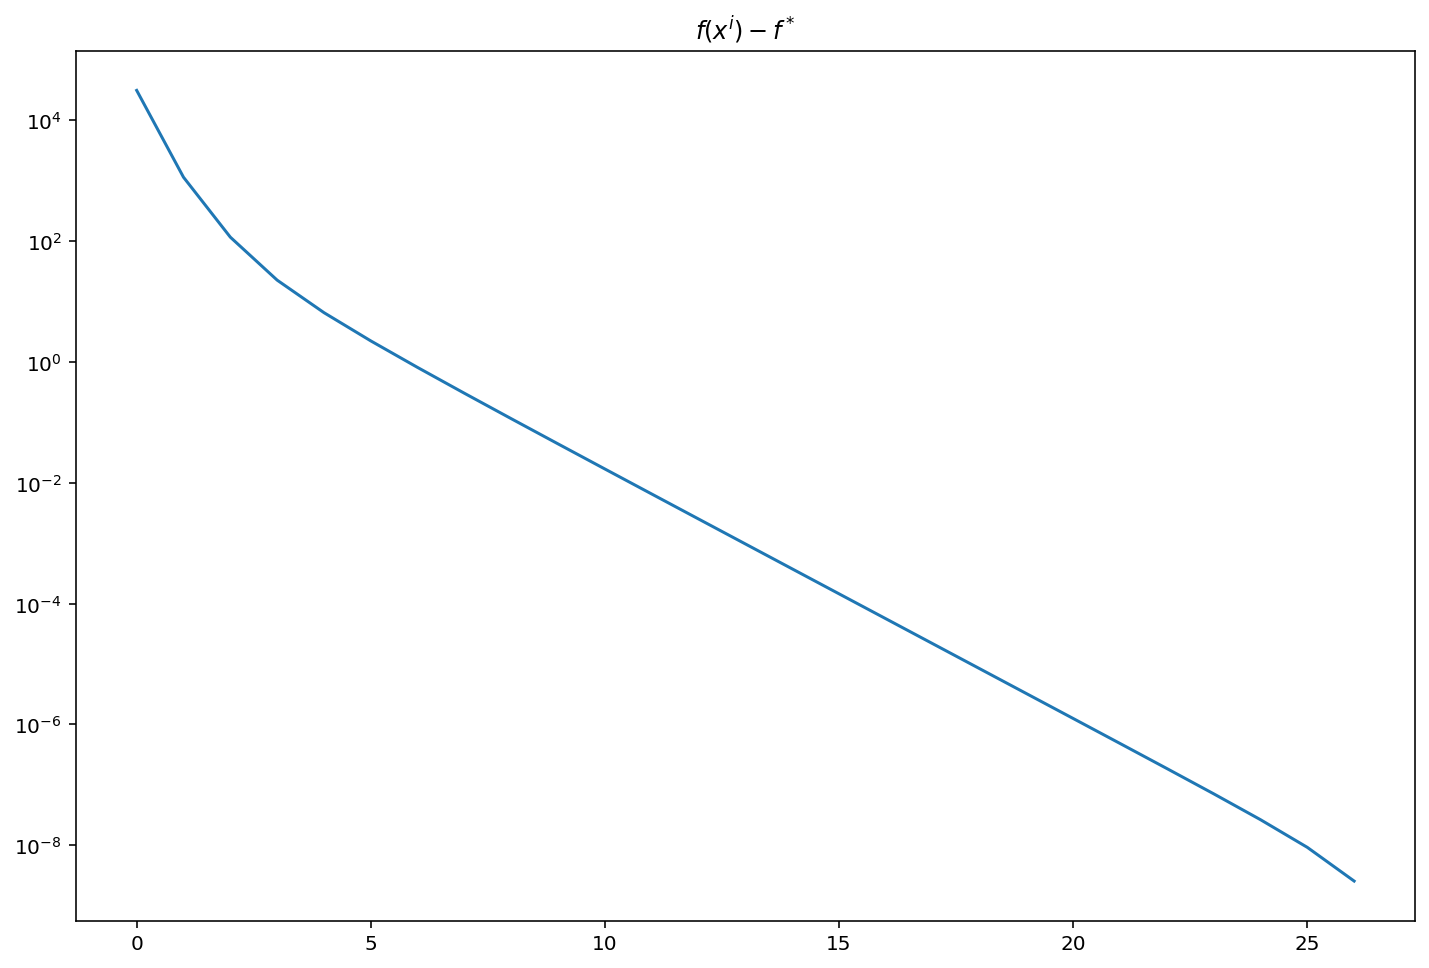

In [10]:
funevals = np.array(data['sparse']['fun_evals']['1'], dtype=np.float64)
plot(funevals[:-1]-funevals[-1], log=True)
plt.title('$f(x^i)-f^*$')

Text(0.5, 1.0, 'gradient of theta')

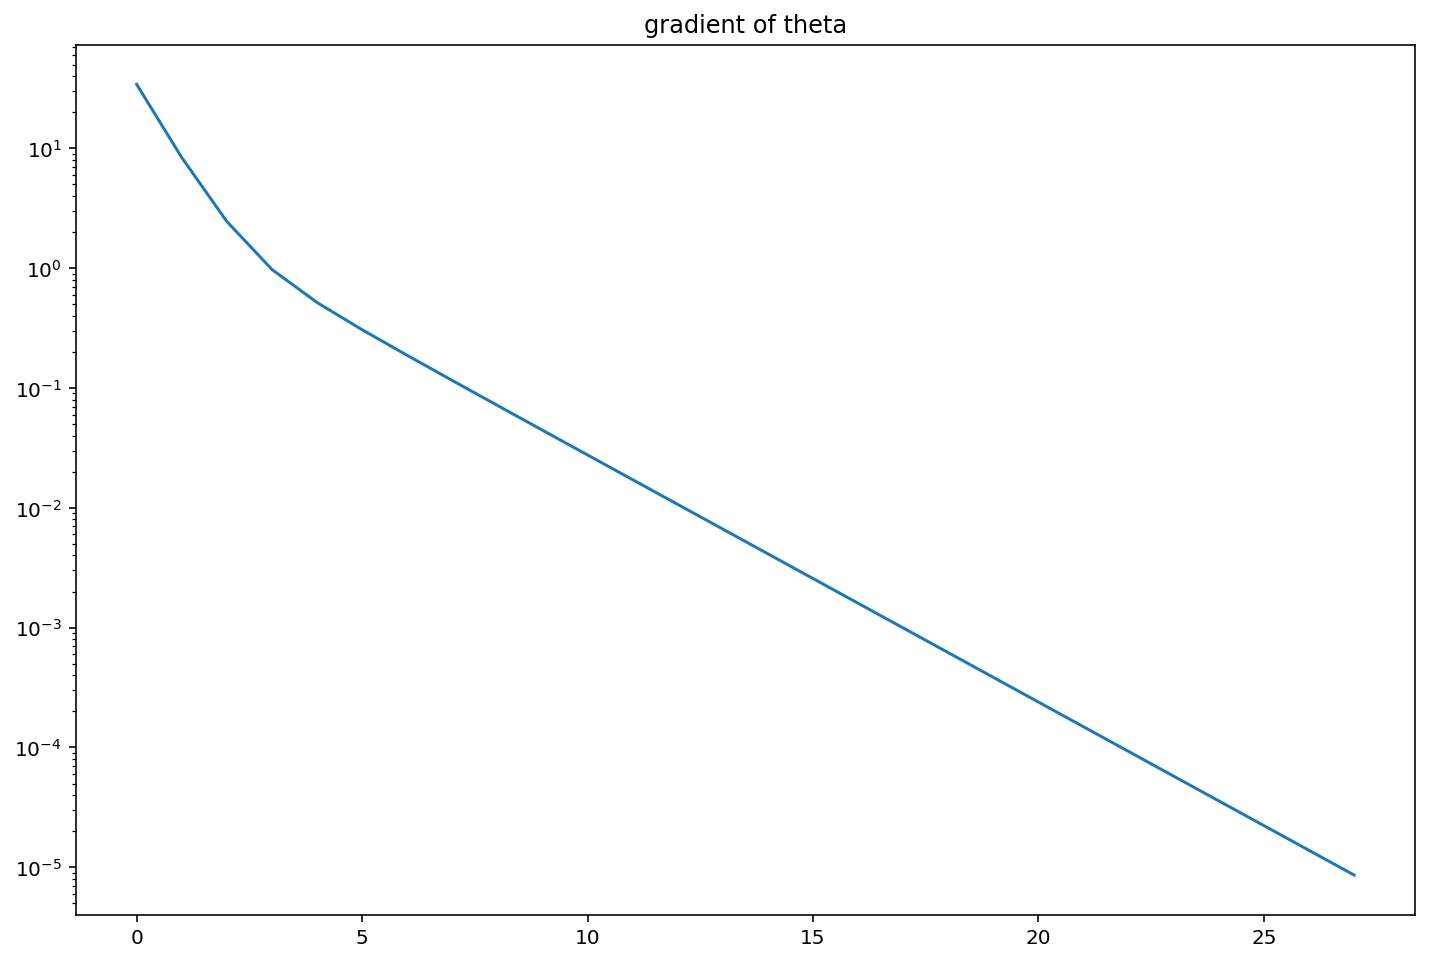

In [14]:
grads = np.array(data['sparse']['grad_theta']['1'], dtype=np.float64)
plot(grads, log=True)
plt.title('gradient of theta')

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
def plot(y, log=False):
    plt.figure(figsize=(12, 8))
    plt.plot(y)
    if log:
        plt.yscale('log')
   

In [3]:
def compute_run_means(fun_evals):
    # fun eval (wrt proposed min) in log scale
    diff_matrix = []
    for exp_no in fun_evals:
        d = np.array(fun_evals[exp_no], dtype=np.float64)
        diff = d[:-1]-d[-1]
        diff = diff[diff>0]
        diff_matrix.append(diff)
        
    max_size = max([len(d) for d in diff_matrix])
    matrix = np.zeros((len(fun_evals), max_size))
    for i, d in enumerate(diff_matrix):
        d = np.array(d)
        matrix[i, 0:len(d)] = d
    means = matrix.sum(axis=0)
    for i in range(max_size):
        means[i] /= np.count_nonzero(matrix[:, i].reshape(-1, 1))
    return means

In [37]:
d = np.array(data['sparse']['fun_evals']['10'], dtype=np.float64)
diff =d[:-1]-d[-1]
print(diff, d[-1], len(diff))
diff = diff[diff>0]
print(diff, len(diff))
np.log(d[:-1]-d[-1])

[ 3.09614542e+06  5.44265828e+04  4.11646894e+03  5.68166763e+02
  1.10735171e+02  2.55173112e+01  6.77986075e+00  2.12974298e+00
  7.92589888e-01  3.35761078e-01  1.53660666e-01  7.31164142e-02
  3.54147144e-02  1.72840431e-02  8.46109539e-03  4.14655358e-03
  2.03271955e-03  9.96496528e-04  4.88527119e-04  2.39409506e-04
  1.17402524e-04  5.75408340e-05  2.81818211e-05  1.38282776e-05
  6.79492950e-06  3.37883830e-06  1.68010592e-06  8.19563866e-07
  4.17232513e-07  2.42143869e-07  9.68575478e-08  4.09781933e-08
  3.35276127e-08  0.00000000e+00  4.09781933e-08  6.33299351e-08
  1.11758709e-08  5.96046448e-08  5.21540642e-08  5.58793545e-08
  1.11758709e-08  2.60770321e-08  3.72529030e-08  1.49011612e-08
  7.45058060e-09 -7.45058060e-09  2.60770321e-08  2.98023224e-08] 27623423.20196691 48
[3.09614542e+06 5.44265828e+04 4.11646894e+03 5.68166763e+02
 1.10735171e+02 2.55173112e+01 6.77986075e+00 2.12974298e+00
 7.92589888e-01 3.35761078e-01 1.53660666e-01 7.31164142e-02
 3.54147144e-02

/home/nick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/nick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


array([ 14.94566848,  10.90460797,   8.32275102,   6.34241497,
         4.7071415 ,   3.23935709,   1.91395656,   0.75600131,
        -0.23244936,  -1.09135545,  -1.87300857,  -2.61570239,
        -3.34062789,  -4.05797157,  -4.77227663,  -5.48547775,
        -6.1983807 ,  -6.9112649 ,  -7.62411557,  -8.33733506,
        -9.04990215,  -9.76301571, -10.47683343, -11.18879496,
       -11.89933389, -12.59797861, -13.29665372, -14.01449351,
       -14.68962218, -15.23373379, -16.15002452, -17.01022578,
       -17.21089648,         -inf, -17.01022578, -16.57490771,
       -18.30950877, -16.63553233, -16.76906373, -16.70007085,
       -18.30950877, -17.46221091, -17.10553596, -18.02182669,
       -18.71497388,          nan, -17.46221091, -17.32867951])

In [ ]:
# fun eval (wrt proposed min) in log scale
mode = 'sparse'
diff_matrix = []
for exp in range(1, 11):
    d = np.array(data[mode]['fun_evals'][str(exp)], dtype=np.float64)
    diff = d[:-1]-d[-1]
    diff = diff[diff>0]
    diff_matrix.append(diff)
plot(np.log(diff)) # dist from "f*"
plt.ylabel('f(x_i) - f*')
plt.yticks([], [])

In [122]:
max_size = max([len(d) for d in diff_matrix])
matrix = np.zeros((10, max_size))
for i, d in enumerate(diff_matrix):
    d = np.array(d)
    matrix[i, 0:len(d)] = d

#matrix -= matrix.mean()
#matrix /= matrix.std()

In [123]:
np.count_nonzero(matrix[:, 40].reshape(-1, 1))

3

In [ ]:
means = matrix.sum(axis=0)
for i in range(max_size):
    means[i] /= np.count_nonzero(matrix[:, i].reshape(-1, 1))
    
var = np.zeros(matrix.shape)
for i in range(10):
    for j in range(max_size):
        if matrix[i, j] != 0.0:
            var[i, j] = (matrix[i, j] - means[i])
var = var.sum(axis=0)
for i in range(max_size):
    var[i] /= np.count_nonzero(matrix[:, i].reshape(-1, 1))
plot(np.log(means))

In [135]:
print(means[1], var.mean())
print(matrix[:, 1]-means[1])
print(np.std(matrix, axis=0))

58813.98258782178 -316781.6718780942
[  2201.84477445  -8716.22881799 -23022.50059948 -21473.10715951
  43173.71797603 -12834.32626526  -7318.24885555  12858.74624282
  19517.50252869  -4387.3998242 ]
[4.54507425e+05 1.92865932e+04 1.28482019e+03 2.05800767e+02
 4.06447296e+01 7.79333790e+00 1.74724782e+00 8.13335281e-01
 4.59058721e-01 2.44410882e-01 1.24964865e-01 6.26149136e-02
 3.10615465e-02 1.53296494e-02 7.54449988e-03 3.70710183e-03
 1.81979143e-03 8.92770952e-04 4.37815471e-04 2.14654297e-04
 1.05215660e-04 5.15631368e-05 2.52732133e-05 1.23725780e-05
 6.07441838e-06 2.95601729e-06 1.45492518e-06 7.07176382e-07
 3.55694807e-07 1.57480672e-07 6.89128362e-08 3.06765838e-08
 2.57557422e-08 1.90099341e-08 2.02300757e-08 1.23553902e-08
 2.40879702e-08 1.86301764e-08 1.92889474e-08 7.49700211e-09
 1.38187684e-08 1.70266552e-08 1.36571398e-08 2.23517418e-09
 7.82310963e-09 8.94069672e-09]


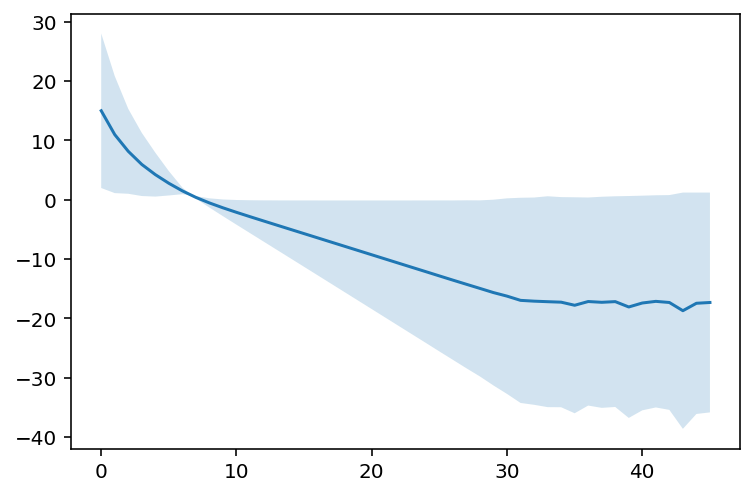

In [146]:
std = np.std(matrix, axis=0)
x = np.arange(max_size)
#fig, ax = plt.subplots()
plt.plot(x, np.log(means))
plt.fill_between(x, np.log(means) - np.log(std), np.log(means) + np.log(std), alpha=0.2)
#ax.plot(x, y, 'o', color='tab:brown')

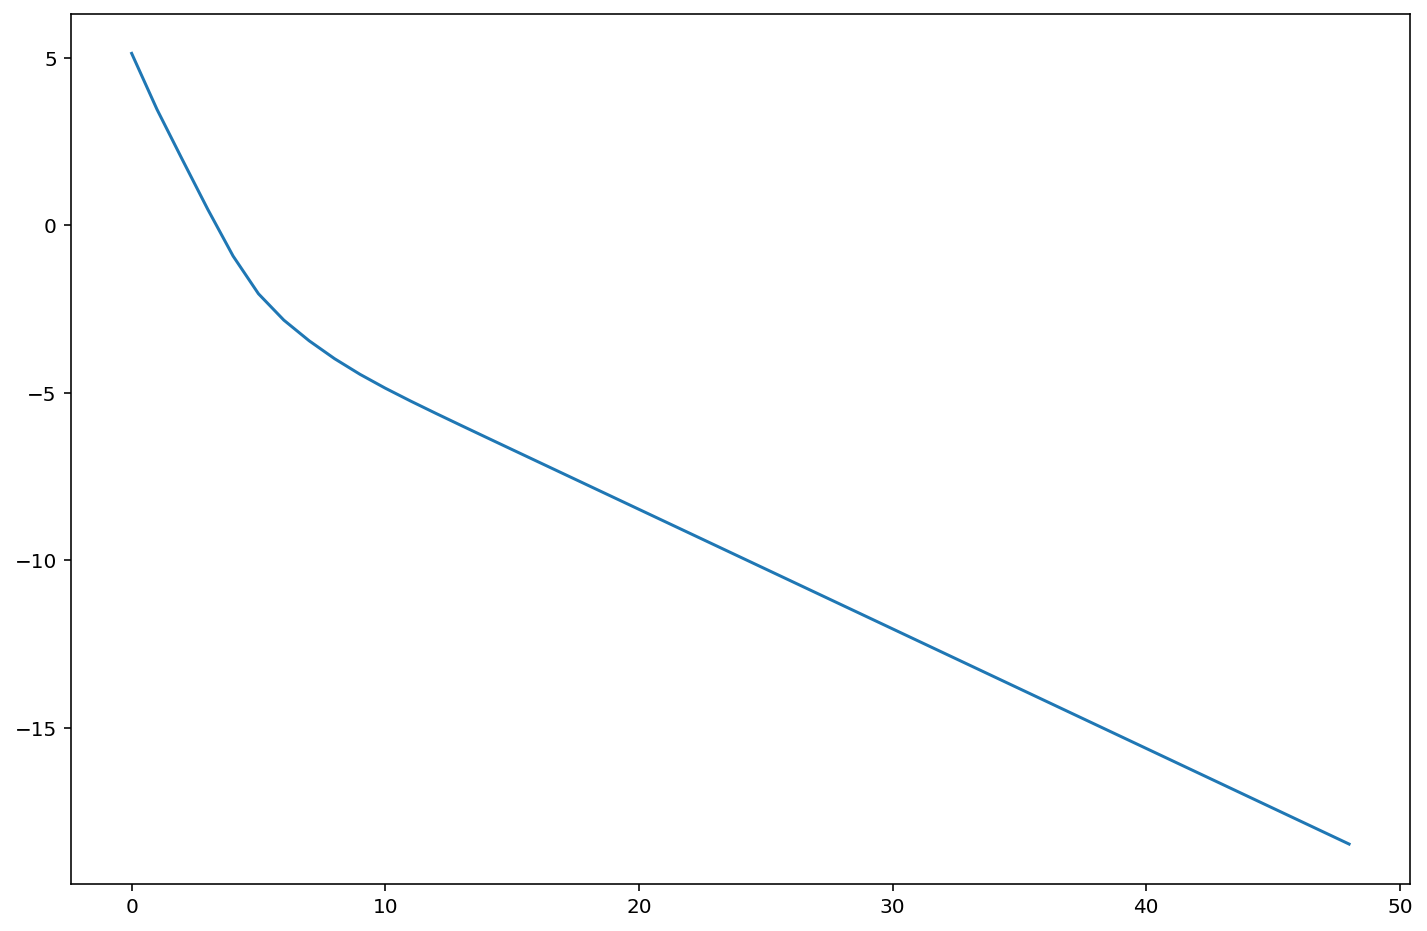

In [39]:
# grad theta
mode = 'sparse'
d = np.array(data[mode]['grad_theta']['1'], dtype=np.float64)
plot(np.log(d))

# Sensiblity comparison

In [3]:
# from pathlib import Path
# # p = Path('/home/nick/uni/cm-results/')
# filenames = [d.glob("*.json") for d in p.iterdir() if d.is_dir()]
# filenames = [str(list(f)[0]) for f in filenames][1:]
# print(filenames)
# data = {}
# for filename in filenames:
#     with open(filename, 'r') as f:
#         data[filename.split('/')[-2]] = json.load(f)
import os
dir_ = '/home/nick/uni/cm-results/grad-comparison/'
filenames = ['grad_e-08', 'grad_e-10', 'grad_e-12']
data = {}
for filename in [os.path.join(dir_, f'{f}.json') for f in filenames]:
    with open(filename, 'r') as f:
        data[filename.split('_')[1]] = json.load(f)

['/Users/nick/uni/cm-results/grad_e-08/als_sparse_13-01-2021_09-10-31.json', '/Users/nick/uni/cm-results/grad_e-12/als_sparse_14-01-2021_09-08-28.json', '/Users/nick/uni/cm-results/grad_e-10/als_sparse_13-01-2021_15-26-16.json']


Text(0.5, 0.04, 'f(x_i)-f*')

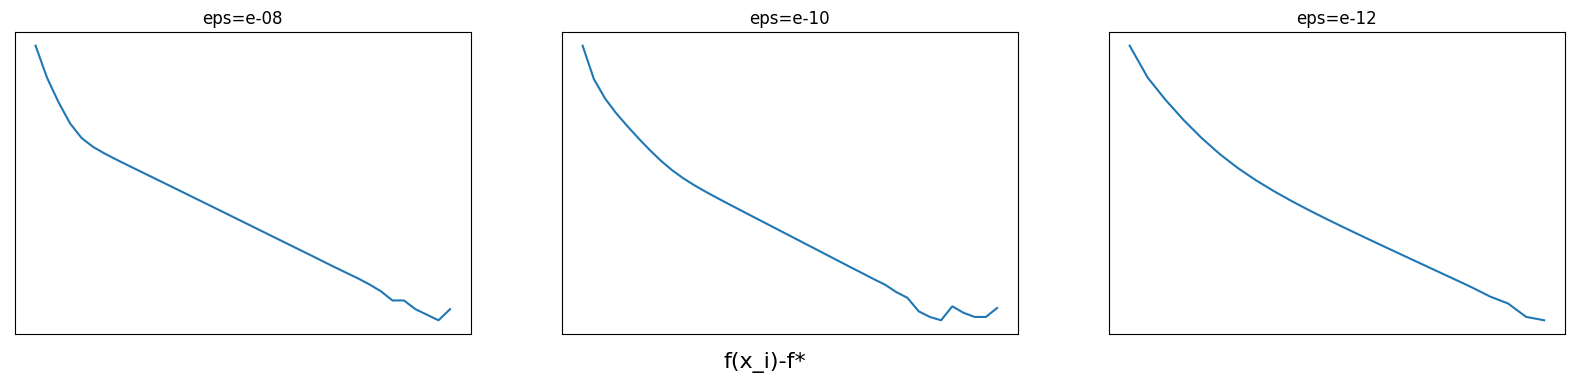

In [5]:
fig, axis = plt.subplots(1, 3, dpi=100, figsize=(20, 4))
keys = ['grad_e-08', 'grad_e-10', 'grad_e-12']
for i in range(3):
    # compute mean value
    #means = compute_run_means(data[keys[i]]['fun_evals'])
    d = data[keys[i]]['fun_evals']['1']
    d = np.array(d, dtype=np.float64)
    d = d[:-1] - d[-1]
    axis[i].plot(d)
    axis[i].set_yscale('log')
    axis[i].set_title(f"$\epsilon={keys[i].split('_')[1]}$")
#     axis[i].set_yticks([])
#     axis[i].set_xticks([])
#plt.grid(False)
fig.text(0.5, 0.04, '$f(x_i)-f^*$', ha='center', fontsize=16)

#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
    #axis[i].ylabel('f(x_i) - f*')
    #axis[i].yticks([], [])


Text(0.5, 0.04, 'Gradient of theta')

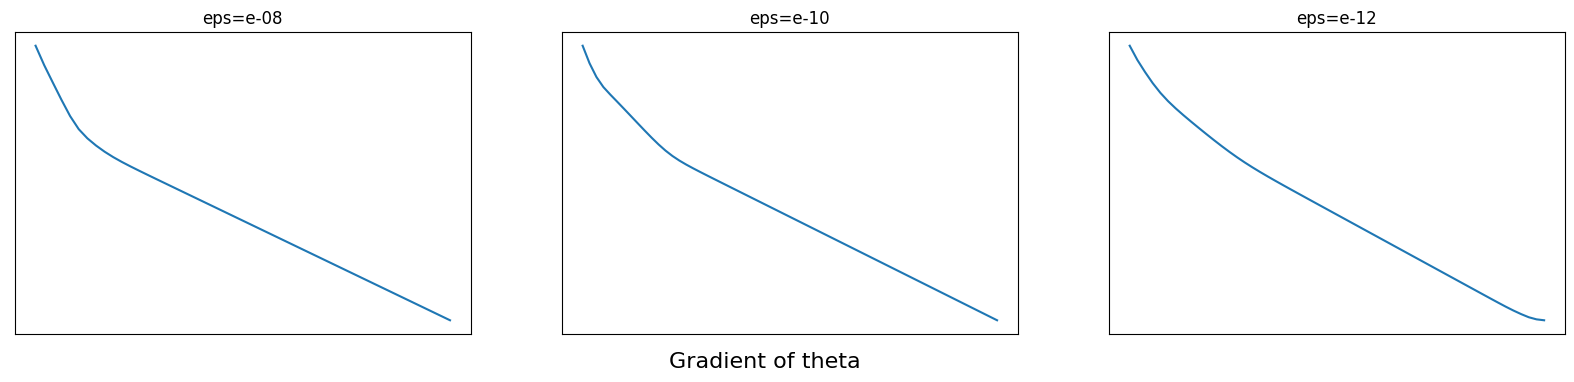

In [6]:
fig, axis = plt.subplots(1, 3, dpi=100, figsize=(20, 4))
keys = ['grad_e-08', 'grad_e-10', 'grad_e-12']
for i in range(3):
    # compute mean value
    #means = compute_run_means(data[keys[i]]['grad_theta'])
    d = data[keys[i]]['grad_theta']['1']
    d = np.array(d, dtype=np.float64)
    axis[i].set_yscale('log')
    axis[i].plot(d)
    axis[i].set_title(f"$\epsilon={keys[i].split('_')[1]}$")
#     axis[i].set_yticks([])
#     axis[i].set_xticks([])
fig.text(0.5, 0.04, 'Gradient of theta', ha='center', fontsize=16)

In [8]:
# tables ALL AVERAGED RESULTS (ASIDE FROM MSE)
keys = ['grad_e-08', 'grad_e-10', 'grad_e-12']
tables = {'Avg iter time': 'avg_iter_time', 'Total Convergence Time (avg)':'total_convergence_time', 
          'Avg Function Evaluation Time': 'avg_fun_eval_time', "Avg Number of iterations": 'num_iterations',
          "Solution gradient": 'grad_u_norm', "Train MSE": 'mse', "Test MSE": 'test_mse'}
for k, d in data.items():
    print("*"*40, k, "*"*40)
    for label, stat in tables.items():
        print(label, d[stat])
    

**************************************** grad_e-08 ****************************************
Avg iter time 13.524273623728867
Total Convergence Time (avg) 630.1361488103867
Avg Function Evaluation Time 2.69638503481132
Avg Number of iterations 46.599999999999994
Solution gradient 7.95175120722938e-09
Train MSE 2.907728758101783
Test MSE 3.2690507442898693
**************************************** grad_e-12 ****************************************
Avg iter time 14.402790038810744
Total Convergence Time (avg) 1967.8851256847383
Avg Function Evaluation Time 2.8579203841519525
Avg Number of iterations 137.8
Solution gradient 8.828945896159838e-13
Train MSE 2.9071620238680356
Test MSE 3.280780027526882
**************************************** grad_e-10 ****************************************
Avg iter time 13.538532269743625
Total Convergence Time (avg) 801.5345452308655
Avg Function Evaluation Time 2.692402672899107
Avg Number of iterations 59.2
Solution gradient 8.360359329439088e-11
Train 

# Dense-Sparse Comparison

In [20]:
from glob import glob
data = {}
for filename in glob('/Users/nick/uni/cm-results/toydata_e1-8/*.json'):
    print(filename)
    with open(filename, 'r') as f:
        data[filename.split('_')[2]] = json.load(f)
data.keys()

/Users/nick/uni/cm-results/toydata_e1-8/als_sparse_14-01-2021_13-14-36.json
/Users/nick/uni/cm-results/toydata_e1-8/als_full_14-01-2021_13-17-14.json


dict_keys(['sparse', 'full'])

In [22]:
# tables ALL AVERAGED RESULTS (ASIDE FROM MSE)
keys = ['grad_e-08', 'grad_e-10', 'grad_e-12']
tables = {'Avg iter time': 'avg_iter_time', 'Total Convergence Time (avg)':'total_convergence_time', 
          'Avg Function Evaluation Time': 'avg_fun_eval_time', "Avg Number of iterations": 'num_iterations',
          "Solution gradient": 'grad_u_norm', "Train MSE": 'mse', "Test MSE": 'test_mse'}
for k, d in data.items():
    print("*"*40, k, "*"*40)
    for label, stat in tables.items():
        print(label, d[stat])

**************************************** sparse ****************************************
Avg iter time 0.17438238409006449
Total Convergence Time (avg) 7.437329983711241
Avg Function Evaluation Time 0.022850979622020276
Avg Number of iterations 42.65
Solution gradient 8.19743024415819e-09
Train MSE 2.4609959628585516
Test MSE 4.106034972280706
**************************************** full ****************************************
Avg iter time 0.23122707961753367
Total Convergence Time (avg) 9.839110422134397
Avg Function Evaluation Time 0.040450989168718005
Avg Number of iterations 42.55
Solution gradient 8.49997569588175e-09
Train MSE 2.468223413526289
Test MSE 4.095633189554455


Text(0.5, 0.04, 'f(x_i)-f*')

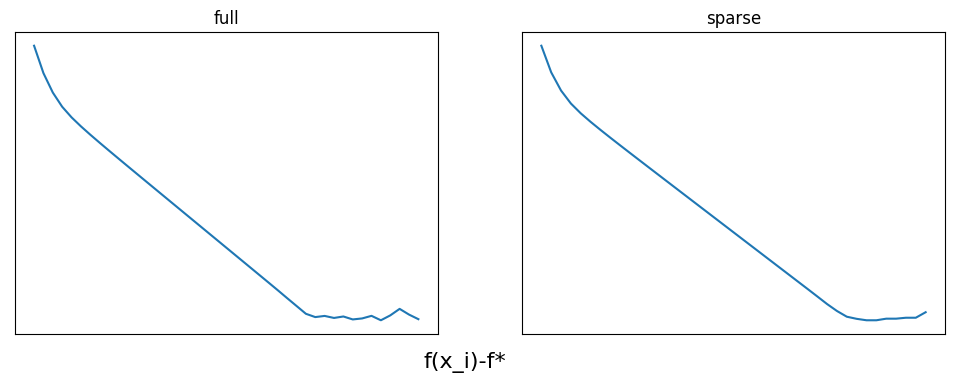

In [25]:
fig, axis = plt.subplots(1, 2, dpi=100, figsize=(12, 4))
keys = ['full', 'sparse']
for i in range(2):
    # compute mean value
    means = compute_run_means(data[keys[i]]['fun_evals'])
    #d = data[keys[i]]['fun_evals']['1']
    #d = np.array(d, dtype=np.float64)
    #d = d[d>d[-1]]
    #d = d[:-1] - d[-1]
    #d = d[d>0]
    axis[i].plot(np.log(means))
    axis[i].set_title(keys[i])
    axis[i].set_yticks([])
    axis[i].set_xticks([])
#plt.grid(False)
fig.text(0.5, 0.04, 'f(x_i)-f*', ha='center', fontsize=16)

#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
    #axis[i].ylabel('f(x_i) - f*')
    #axis[i].yticks([], [])


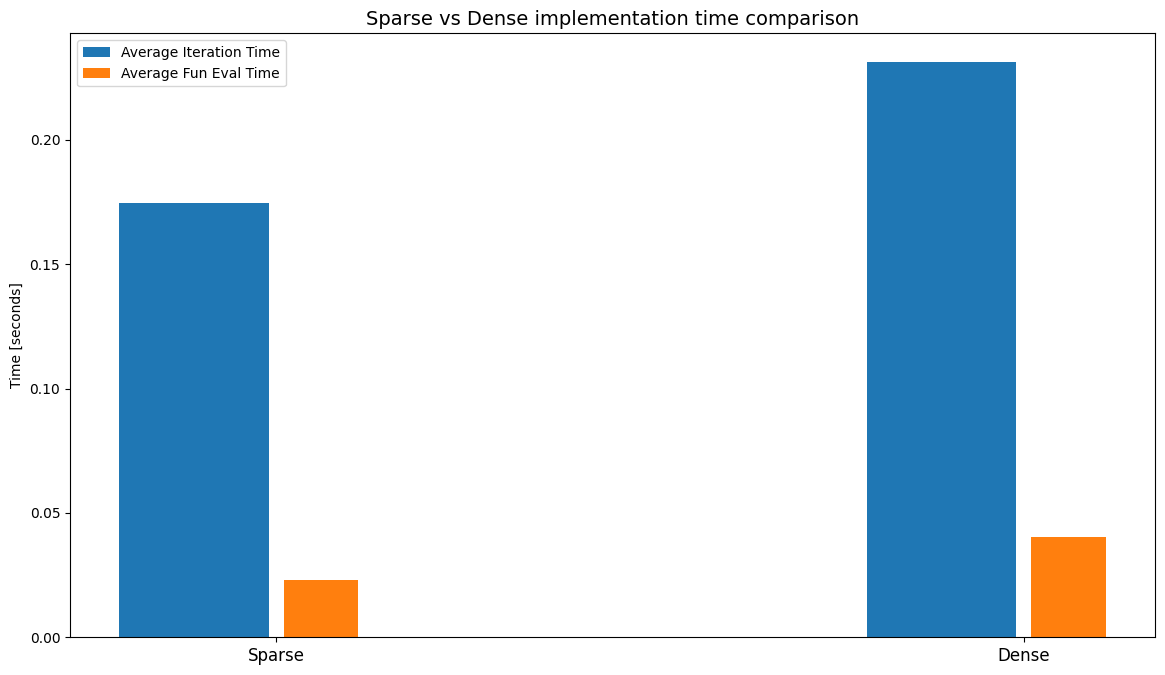

In [77]:
plt.figure(figsize=(14,8), dpi= 100)
# iter time includes optim step and grad computation
N = 2
colors = [plt.cm.Spectral(i*2/float(N-1)) for i in range(N)]
x = np.arange(0, 1, 0.5)
width = 0.1       # the width of the bars: can also be len(x) sequence
fun_eval_time = [data[d]['avg_fun_eval_time'] for d in data]
avg_iter_time = [data[d]['avg_iter_time'] for d in data]

# std dev with error on y 
plt.bar(x, avg_iter_time, width,align='edge')#, color=['orange', 'turquoise'])
plt.bar(x+width+.01, fun_eval_time, [.05, .05], align='edge')#, color=['orange', 'turquoise'])

plt.ylabel('Time [seconds]')
plt.title('Sparse vs Dense implementation time comparison', fontsize=14)
plt.xticks(x+width+0.005, ['Sparse', 'Dense'], fontsize=12)
#plt.yticks(np.arange(0, 81, 10))
plt.legend(['Average Iteration Time', 'Average Fun Eval Time'])


plt.show()

In [26]:
data['sparse'].keys()

dict_keys(['avg_iter_time', 'total_convergence_time', 'avg_fun_eval_time', 'num_iterations', 'grad_u_norm', 'theta_diff_norm', 'mse', 'fun_evals', 'grad_theta', 'number_of_ratings', 'dataset_path', 'grad_sensibility', 'theta_diff_sensibility', 'num_experiments', 'warmup_cycles', 'experiments_total_runtime', 'date', 'train_mse', 'test_mse'])

# Predict user taste

In [3]:
# load pre-computed u,v vecs
u = np.load('../sparse_U.npy')
v = np.load('../sparse_V.npy')
# load 10m dataset
from dataset import MovieLensDataset
d = MovieLensDataset('/home/nick/datasets/ml-25m/smaller/')

Loading MovieLens dataset from /home/nick/datasets/ml-25m/smaller/ with mode sparse..
Column names are userId, movieId, rating, timestamp
Processed 10000000 lines. 64883 users x 46435 movies.
Dataset contains 9999999 ratings (0.3319124816864573% matrix density)


In [4]:
from main import show_movie_recommendations
import random
trainX, testX = d.train_test_split_simple(d.n_ratings//20) 
userx = random.randint(0, d.n_users)
print(
    f"Showing some of the proposed recommendation for user {userx}..")
show_movie_recommendations(d)

Extracting test set..
Showing some of the proposed recommendation for user 55729..


NameError: name 'userx' is not defined

In [5]:
def get_topk_movies_ids(x, k):
    # fucking uint8 flips out if you put a minus before argsorting
    x = x.reshape(-1,).astype(np.int64)
    p = np.argsort(-x)
#     print(np.sort(-x))
    return p[:k]

# get a user
userx = random.randint(0, 10)
userx = 1


In [6]:
print(userx)
# see what user likes the most
user_row = trainX[userx].A.reshape(-1,)
# print(user_row.shape, user_row.min(), user_row.max(), user_row)
ind = get_topk_movies_ids(user_row, 4)
print('ind', ind, user_row[ind])
# these are the movies they liked the most
# get movie titles
print([d.get_movie_info(mid) for mid in ind])

1
ind [130 203 202 101] [10 10 10 10]
Loading information about movies from /home/nick/datasets/ml-25m/smaller/movies.csv..
[{'title': 'Hunt for Red October, The (1990)', 'genre': 'Action|Adventure|Thriller'}, {'title': 'Beautiful Mind, A (2001)', 'genre': 'Drama|Romance'}, {'title': 'Lord of the Rings: The Fellowship of the Ring, The (2001)', 'genre': 'Adventure|Fantasy'}, {'title': 'Monty Python and the Holy Grail (1975)', 'genre': 'Adventure|Comedy|Fantasy'}]


In [7]:
# rows, cols = testX.nonzero()
# testX[userx].data
# compute factorization of user's preferences for every movie
ratings = u[userx] * v

In [10]:
# check against ground truth data
_, test_idx = testX[userx].nonzero()
print("test movies ids", test_idx)
ratings = ratings.reshape(-1,)
print(ratings[test_idx], ratings.shape)
preds = ratings[test_idx]
testX[userx].data

test movies ids [ 36 107 108 163 169 192 193 195 209 232]
[8.02610901 7.84986426 7.63578016 6.15031306 7.75931106 6.66102007
 7.44537764 6.80480423 6.70462289 7.49705212] (46435,)


array([10,  8, 10,  8,  9,  9,  9,  3,  6, 10], dtype=uint8)

In [11]:
# get expected best movie 
preds = ratings
mask = np.zeros(len(ratings), dtype=np.bool)
mask[test_idx] = 1
print(mask.shape)
# zero out elems not in test
preds = preds * mask
print(preds)
print(preds[preds>0])
preds = preds.reshape(-1,)
ind2 = get_topk_movies_ids(preds, 4)
print(preds[ind2], ind2)
print([d.get_movie_info(mid) for mid in ind2])

(46435,)
[0. 0. 0. ... 0. 0. 0.]
[8.02610901 7.84986426 7.63578016 6.15031306 7.75931106 6.66102007
 7.44537764 6.80480423 6.70462289 7.49705212]
[8.02610901 7.49705212 7.44537764 7.63578016] [ 36 232 193 108]
[{'title': 'Lord of the Rings: The Two Towers, The (2002)', 'genre': 'Adventure|Fantasy'}, {'title': 'Harry Potter and the Prisoner of Azkaban (2004)', 'genre': 'Adventure|Fantasy|IMAX'}, {'title': 'Shrek (2001)', 'genre': 'Adventure|Animation|Children|Comedy|Fantasy|Romance'}, {'title': 'Better Off Dead... (1985)', 'genre': 'Comedy|Romance'}]


In [17]:
test = testX[userx].A.reshape(-1,)
movies = get_topk_movies_ids(test, 6)
print(test[movies])
print([d.get_movie_info(mid) for mid in movies])

[10 10 10  9  9  9]
[{'title': 'Harry Potter and the Prisoner of Azkaban (2004)', 'genre': 'Adventure|Fantasy|IMAX'}, {'title': 'Better Off Dead... (1985)', 'genre': 'Comedy|Romance'}, {'title': 'Lord of the Rings: The Two Towers, The (2002)', 'genre': 'Adventure|Fantasy'}, {'title': "Knight's Tale, A (2001)", 'genre': 'Action|Comedy|Romance'}, {'title': 'Shrek (2001)', 'genre': 'Adventure|Animation|Children|Comedy|Fantasy|Romance'}, {'title': "Ferris Bueller's Day Off (1986)", 'genre': 'Comedy'}]


In [16]:
ind3 = get_topk_movies_ids(ratings, 4)
print([d.get_movie_info(mid) for mid in ind3])

[{'title': 'Ittefaq', 'genre': '(no genres listed)'}, {'title': 'Inside Out (1991)', 'genre': 'Comedy|Drama|Romance'}, {'title': 'Gargandi snilld (2005)', 'genre': 'Documentary'}, {'title': 'Ken (1964)', 'genre': '(no genres listed)'}]
